# Regression Project

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

import re

In [135]:
X_train = pd.read_csv('X.csv')
X_train.sample(5)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
2424,5128,5128,37.0,M,bachelor's|degr,project|manage,11.0,canad,Black,2.353223,86.404832,5128,350.0
3921,3196,3196,38.0,M,bachelor's|degr,data|analys,13.0,canad,White,1.872764,73.124509,3196,407.0
1977,5517,5517,28.0,M,bachelor's|degr,software|enginee,4.0,chin,Korean,1.573031,52.982939,5517,81.0
3436,5699,5699,29.0,F,bachelor's|degr,marketing|analys,5.0,australi,White,1.926492,35.280288,5699,84.0
5112,4406,4406,27.0,M,bachelor's|degr,software|enginee,2.0,us,White,1.598833,42.933518,4406,26.0


In [136]:
y_train = pd.read_csv('y.csv')
y_train.head(5)

,id,Salary
0,2477,175966.0
1,76,160000.0
2,64,35000.0
3,924,195000.0
4,242,120000.0


In [137]:
X_test_csv = pd.read_csv('X_test.csv')
X_test_csv.head(5)

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,6480,6480,47.0,M,master's|degr,director|of|marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0
1,5343,5343,29.0,F,bachelor's|degr,social|media|manage,4.0,us,African American,1.562833,59.760856,5343,81.0
2,2576,2576,29.0,M,high|scho,back|end|develope,5.0,us,African American,2.059395,46.765234,2576,108.0
3,6103,6103,40.0,M,master's|degr,marketing|directo,15.0,us,Asian,2.482954,89.530121,6103,532.0
4,3290,3290,29.0,M,bachelor's|degr,software|enginee,6.0,us,African American,1.639781,42.973461,3290,112.0


In [138]:
X_test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1341 non-null   int64  
 1   Unnamed: 0           1341 non-null   int64  
 2   Age                  1341 non-null   float64
 3   Gender               1341 non-null   object 
 4   Education Level      1341 non-null   object 
 5   Job Title            1341 non-null   object 
 6   Years of Experience  1341 non-null   float64
 7   Country              1341 non-null   object 
 8   Race                 1341 non-null   object 
 9   height               1341 non-null   float64
 10  weight               1341 non-null   float64
 11  id                   1341 non-null   int64  
 12  professionalism      1341 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 136.3+ KB


In [139]:
X_train.drop('Unnamed: 0.1', axis=1, inplace=True)
X_train.drop('Unnamed: 0', axis =1, inplace=True)
X_test_csv.drop('Unnamed: 0.1', axis=1, inplace=True)
X_test_csv.drop('Unnamed: 0', axis =1, inplace=True)

# EDA

In [140]:
merged_df = pd.merge(X_train, y_train, on='id')

In [141]:
# # clear all null lines from dataframe

# for column in merged_df.columns:
#     without_nulls = merged_df[column].notnull() 
#     merged_df = merged_df[without_nulls]

In [142]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 0 to 5362
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5359 non-null   float64
 1   Gender               5359 non-null   object 
 2   Education Level      5360 non-null   object 
 3   Job Title            5361 non-null   object 
 4   Years of Experience  5360 non-null   float64
 5   Country              5363 non-null   object 
 6   Race                 5363 non-null   object 
 7   height               5363 non-null   float64
 8   weight               5361 non-null   float64
 9   id                   5363 non-null   int64  
 10  professionalism      5360 non-null   float64
 11  Salary               5358 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 544.7+ KB


In [143]:
merged_df.describe().style.format("{:.2f}")

,Age,Years of Experience,height,weight,id,professionalism,Salary
count,5359.00,5360.00,5363.00,5361.00,5363.00,5360.00,5358.00
mean,35.15,9.66,2.00,66.94,3362.79,316.37,115624.13
std,7.62,6.44,0.29,18.35,1934.20,304.99,52754.95
min,22.00,1.00,1.50,13.64,0.00,0.00,500.00
25%,29.00,5.00,1.75,53.89,1692.50,84.00,70000.00
50%,33.00,8.00,2.00,64.75,3363.00,217.00,115000.00
75%,39.00,13.00,2.26,78.37,5044.50,451.00,160000.00
max,64.00,120.00,2.50,200.00,6703.00,2040.00,250000.00


In [144]:
merged_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0
4,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0


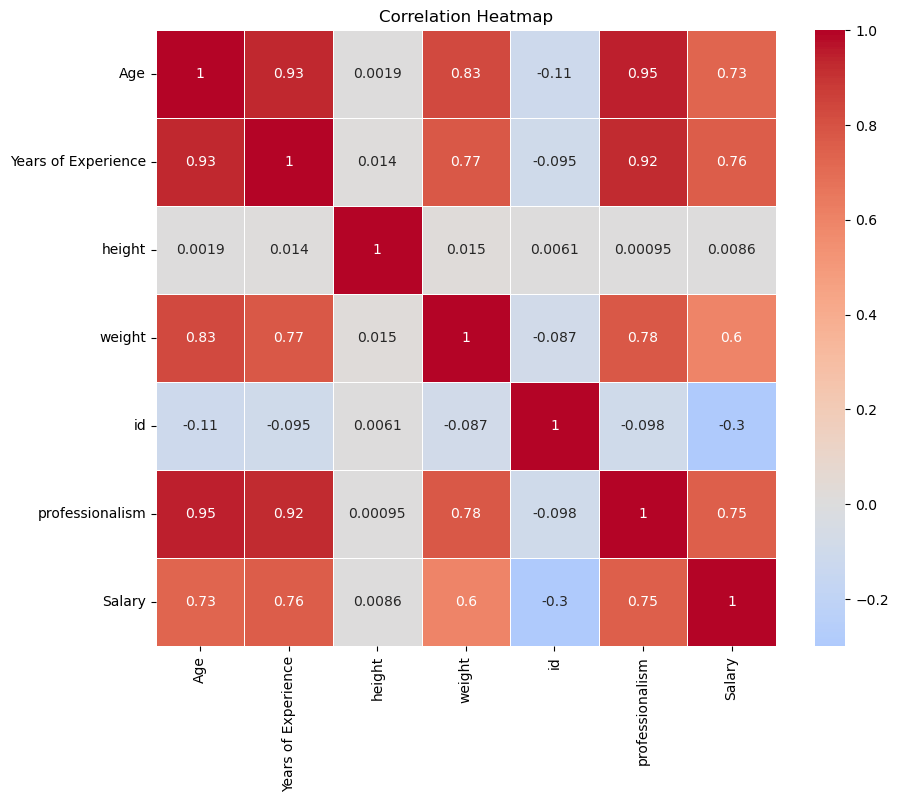

In [145]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

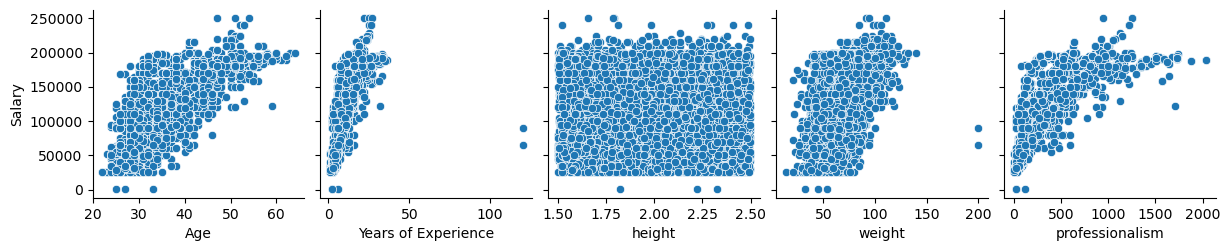

In [146]:
sns.pairplot(merged_df, x_vars=['Age', 'Years of Experience', 'height', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

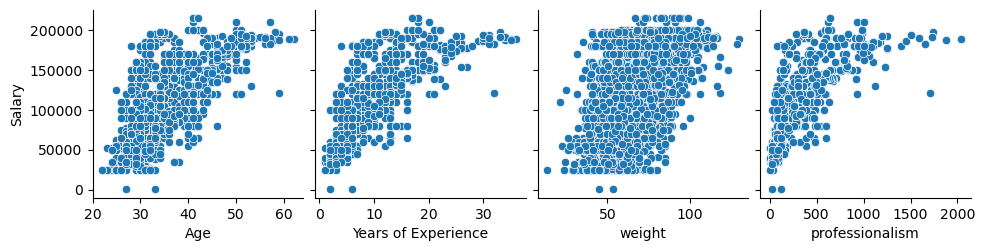

In [147]:
df_female = merged_df.loc[merged_df['Gender'] == 'F']

sns.pairplot(df_female, x_vars=['Age', 'Years of Experience', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

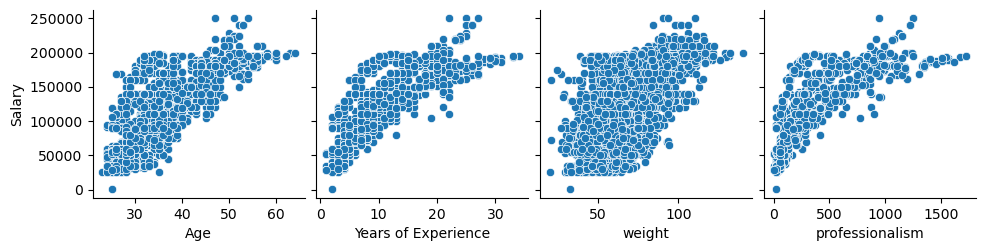

In [148]:
df_male = merged_df.loc[merged_df['Gender'] == 'M']

sns.pairplot(df_male, x_vars=['Age', 'Years of Experience', 'weight', 'professionalism'],
             y_vars=['Salary'], kind='scatter')
plt.show()

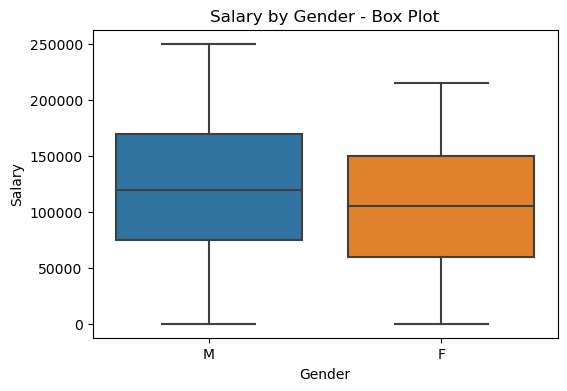

In [149]:
merged_df = merged_df[merged_df['Gender'].isin(['F', 'M'])]

plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=merged_df)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary by Gender - Box Plot')
plt.show()

In [150]:
# Independent t-test to understand if The differences significant
import scipy.stats as stats

female_salaries = merged_df[merged_df['Gender'] == 'F']['Salary']
male_salaries = merged_df[merged_df['Gender'] == 'M']['Salary']

female_salaries = female_salaries.dropna()
male_salaries = male_salaries.dropna()

t_statistic, p_value = stats.ttest_ind(female_salaries, male_salaries, alternative='two-sided') #'two-sided' = means are not equal

print("t-statistic:", t_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The differences in salary between Female and Male are statistically significant")
else:
    print("The differences in salary between Female and Male are not statistically significant")

t-statistic: -8.670569924715746
p-value: 5.626675237601645e-18
The differences in salary between Female and Male are statistically significant


In [151]:
# creating a new column for experience level

experience_level = ['junior', 'juniour', 'senior', 'director', 'directo', 'chief', 'vp', 'training']

def experience_cat(title):
    if isinstance(title, str):  # Check if title is a string
        title_words = title.lower().split('|')

        for word in title_words:
            if word in experience_level:
                return word
    return 'null'

merged_df['new_col_experience_level'] = merged_df['Job Title'].apply(experience_cat)

merged_df['new_col_experience_level'] = merged_df['new_col_experience_level'].replace("juniour", "junior").replace("directo", "director")
print(merged_df['new_col_experience_level'].unique())

['null' 'junior' 'senior' 'director' 'training' 'chief' 'vp']


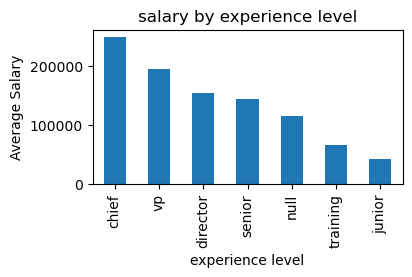

In [152]:
average_salary_by_role_Level = merged_df.groupby('new_col_experience_level')['Salary'].mean()
salary_by_role_Level_desc = average_salary_by_role_Level.sort_values(ascending=False).round(2)

salary_by_role_Level_desc.plot(kind = 'bar', figsize=(4,2))

plt.title('salary by experience level')
plt.xlabel('experience level')
plt.ylabel('Average Salary')
plt.show()

In [153]:
# creating a new column for job_title

def clean_job_title(title):
    if isinstance(title, str):
        title_words = title.lower().split('|')

        cleaned_words = [word for word in title_words if word not in experience_level]
        cleaned_title = '|'.join(cleaned_words)
        cleaned_title = cleaned_title.replace('|', '_')  # Replace '|' with '_'
        
        return cleaned_title
    return title

merged_df['Job Title'] = merged_df['Job Title'].apply(clean_job_title)

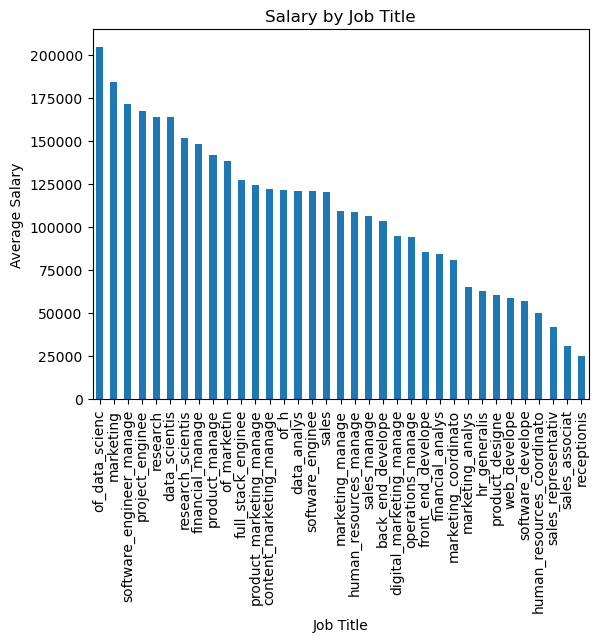

In [154]:
value_counts_over_30 = merged_df['Job Title'].value_counts()[merged_df['Job Title'].value_counts() >= 30]

filtered_df = merged_df[merged_df['Job Title'].isin(value_counts_over_30.index)]

average_salary_for_job = filtered_df.groupby('Job Title')['Salary'].mean().round(2)

average_salary_for_job_desc = average_salary_for_job.sort_values(ascending=False)


average_salary_for_job_desc.plot(kind = 'bar')

plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [155]:
# Define jobs for each categories

sales_marketing = ['market', 'sales', 'fin']
tech = ['eng', 'dev', 'analys', 'scien', 'research', 'product']
hr = ['human', 'hr', 'h']
office = ['reception', 'operations', 'office']
designe = ['designe']

# Function to categorize job titles based on root words
def job_categorise(title):
    title_lower = title.lower()
    for word in title_lower.split():
        for names_list, category in [
            (sales_marketing, 'Sales/Marketing'),
            (tech, 'Tech'),
            (hr, 'HR'),
            (office, 'Office'),
            (designe, 'Design')
        ]:
            if any(name in word for name in names_list):
                return category
    return 'null'

for title in merged_df['Job Title']:
    print(f"{title}: {job_categorise(title)}")

back_end_develope: Tech
operations_manage: Office
accountan: null
data_analys: Tech
product_manage: Tech
marketing_manage: Sales/Marketing
marketing_manage: Sales/Marketing
of_marketin: Sales/Marketing
product_manage: Tech
data_scientis: Tech
software_engineer_manage: Tech
marketing_manage: Sales/Marketing
full_stack_enginee: Tech
human_resources_manage: HR
software_engineer_manage: Tech
data_scientis: Tech
web_develope: Tech
research_scientis: Tech
marketing_manage: Sales/Marketing
research_scientis: Tech
marketing_analys: Sales/Marketing
software_engineer_manage: Tech
data_scientis: Tech
of_h: HR
marketing_coordinato: Sales/Marketing
product_manage: Tech
digital_marketing_manage: Sales/Marketing
full_stack_enginee: Tech
research_scientis: Tech
marketing_analys: Sales/Marketing
back_end_develope: Tech
product_manage: Tech
product_manage: Tech
software_enginee: Tech
marketing_manage: Sales/Marketing
front_end_develope: Tech
software_enginee: Tech
software_enginee: Tech
full_stack_engin

In [156]:
merged_df.loc[:, 'new_col_job_cat'] = merged_df['Job Title'].apply(job_categorise)
merged_df

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary,new_col_experience_level,new_col_job_cat
0,52.0,M,bachelor's|degr,back_end_develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0,null,Tech
1,52.0,F,bachelor,operations_manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0,null,Office
2,27.0,M,bachelor,accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0,junior,null
3,32.0,M,bachelor,data_analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0,null,Tech
4,39.0,F,bachelor,product_manage,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0,senior,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,business_development_associat,4.0,canad,Black,2.329507,64.070050,354,93.0,50000.0,junior,Tech
5359,44.0,M,p,data_scientis,15.0,chin,White,1.945457,93.478548,3677,546.0,140000.0,null,Tech
5360,25.0,M,high|scho,delivery_drive,1.0,canad,Asian,1.575751,38.216264,6032,0.0,28000.0,null,null
5361,32.0,F,bachelor's|degr,software_enginee,6.0,chin,White,1.797528,56.571118,3278,150.0,90000.0,null,Tech


In [157]:
merged_df['new_col_job_cat'].unique()

array(['Tech', 'Office', 'null', 'Sales/Marketing', 'HR', 'Design'],
      dtype=object)

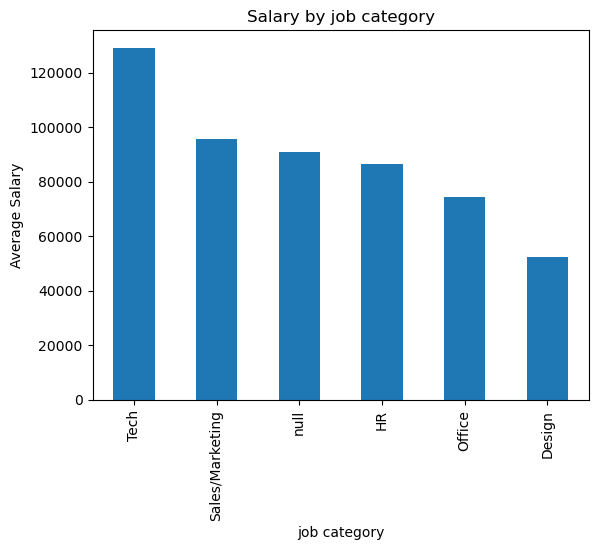

In [158]:
average_salary_for_job_cat = merged_df.groupby('new_col_job_cat')['Salary'].mean().round(2)

average_salary_for_job_cat_desc = average_salary_for_job_cat.sort_values(ascending=False)

average_salary_for_job_cat_desc.plot(kind = 'bar')

plt.title('Salary by job category')
plt.xlabel('job category')
plt.ylabel('Average Salary')
plt.show()

In [159]:
#There does not appear to be an effect of country on salary
average_salary_by_country = merged_df.groupby('Country')['Salary'].mean()
average_salary_by_country

Country
australi    115334.338332
canad       117215.063551
chin        115955.423114
u           116332.598703
us          113243.113784
Name: Salary, dtype: float64

In [160]:
#There does not appear to be an effect of race on salary
average_salary_by_race = merged_df.groupby('Race')['Salary'].mean()
average_salary_by_race.sort_values(ascending=False)

Race
Black               120310.091954
Korean              117238.190883
White               117197.745110
Mixed               116242.225455
Asian               116177.856366
Australian          114197.822222
Welsh               113120.034091
Chinese             111477.532951
African American    110176.622711
Hispanic            109507.764940
Name: Salary, dtype: float64

In [161]:
merged_df['Education Level'].unique()

array(["bachelor's|degr", 'bachelor', "master's|degr", 'p', 'master',
       'high|scho', nan], dtype=object)

In [162]:
merged_df['Education Level'] = merged_df['Education Level'].replace("master's|degr", "master").replace("bachelor's|degr", "bachelor")
merged_df = merged_df.dropna(subset=['Education Level'])
merged_df['Education Level'].unique()

array(['bachelor', 'master', 'p', 'high|scho'], dtype=object)

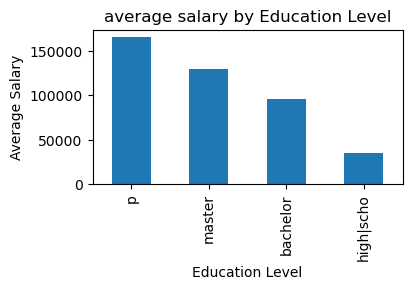

In [163]:
average_salary_by_Education_Level = merged_df.groupby('Education Level')['Salary'].mean()
average_salary_Education_Level_desc = average_salary_by_Education_Level.sort_values(ascending=False)

average_salary_Education_Level_desc.plot(kind = 'bar', figsize=(4,2))

plt.title('average salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()

# Regression Tree Model

In [164]:
from sklearn.tree import DecisionTreeRegressor
merged_df

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism,Salary,new_col_experience_level,new_col_job_cat
0,52.0,M,bachelor,back_end_develope,24.0,australi,Asian,1.800316,95.021957,2477,1150.0,175966.0,null,Tech
1,52.0,F,bachelor,operations_manage,23.0,us,White,2.451414,87.456039,76,1100.0,160000.0,null,Office
2,27.0,M,bachelor,accountan,2.0,australi,Australian,1.917509,56.997108,64,26.0,35000.0,junior,null
3,32.0,M,bachelor,data_analys,11.0,u,Welsh,2.160562,61.403169,924,279.0,195000.0,null,Tech
4,39.0,F,bachelor,product_manage,11.0,chin,Korean,1.794105,72.049210,242,380.0,120000.0,senior,Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,business_development_associat,4.0,canad,Black,2.329507,64.070050,354,93.0,50000.0,junior,Tech
5359,44.0,M,p,data_scientis,15.0,chin,White,1.945457,93.478548,3677,546.0,140000.0,null,Tech
5360,25.0,M,high|scho,delivery_drive,1.0,canad,Asian,1.575751,38.216264,6032,0.0,28000.0,null,null
5361,32.0,F,bachelor,software_enginee,6.0,chin,White,1.797528,56.571118,3278,150.0,90000.0,null,Tech


In [165]:
merged_df_copy = merged_df.copy()
merged_df_copy['Gender'] = merged_df_copy['Gender'].replace({'F': 0,'M': 1})
merged_df_copy['Education Level'] = \
    merged_df_copy['Education Level'].replace({'high|scho':0,'bachelor':1,'master':1,'p':2})
merged_df_copy['new_col_experience_level'] = \
    merged_df_copy['new_col_experience_level'].replace({'training':0,'junior':0,'null':1,'senior':1,'director':1,'chief':2,'vp':2})
merged_df_copy['new_col_job_cat'] = \
    merged_df_copy['new_col_job_cat'].replace({'HR': 0,'Design':0,'Office':0,'null':1,'Sales/Marketing':1,'Tech':2})

In [166]:
columns_to_drop = ['Country', 'Race', 'height', 'Job Title', 'id'] #'weight','Age','Years of Experience','professionalism']

merged_df_copy.drop(columns = columns_to_drop, axis=1, inplace=True)

In [167]:
# Fill NaN values in columns

def fillna_columns(dataframe, columns, value=0):
    for column in columns:
        dataframe[column] = dataframe[column].fillna(value)

columns_to_fill = ['Salary', 'Age', 'Years of Experience', 'professionalism', 'weight']

fillna_columns(merged_df_copy, columns_to_fill)

In [168]:
merged_df_copy

,Age,Gender,Education Level,Years of Experience,weight,professionalism,Salary,new_col_experience_level,new_col_job_cat
0,52.0,1,1,24.0,95.021957,1150.0,175966.0,1,2
1,52.0,0,1,23.0,87.456039,1100.0,160000.0,1,0
2,27.0,1,1,2.0,56.997108,26.0,35000.0,0,1
3,32.0,1,1,11.0,61.403169,279.0,195000.0,1,2
4,39.0,0,1,11.0,72.049210,380.0,120000.0,1,2
...,...,...,...,...,...,...,...,...,...
5358,32.0,0,1,4.0,64.070050,93.0,50000.0,0,2
5359,44.0,1,2,15.0,93.478548,546.0,140000.0,1,2
5360,25.0,1,0,1.0,38.216264,0.0,28000.0,1,1
5361,32.0,0,1,6.0,56.571118,150.0,90000.0,1,2


In [169]:
X = merged_df_copy.drop('Salary', axis=1)
y = merged_df_copy['Salary']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3) # max_leaf_nodes=50

model.fit(X_train, y_train)

# predictions on the train data
y_pred_train = model.predict(X_train)

# predictions on the test data
y_pred_test = model.predict(X_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 15393.545628019057
Test RMSE: 17151.537313045137


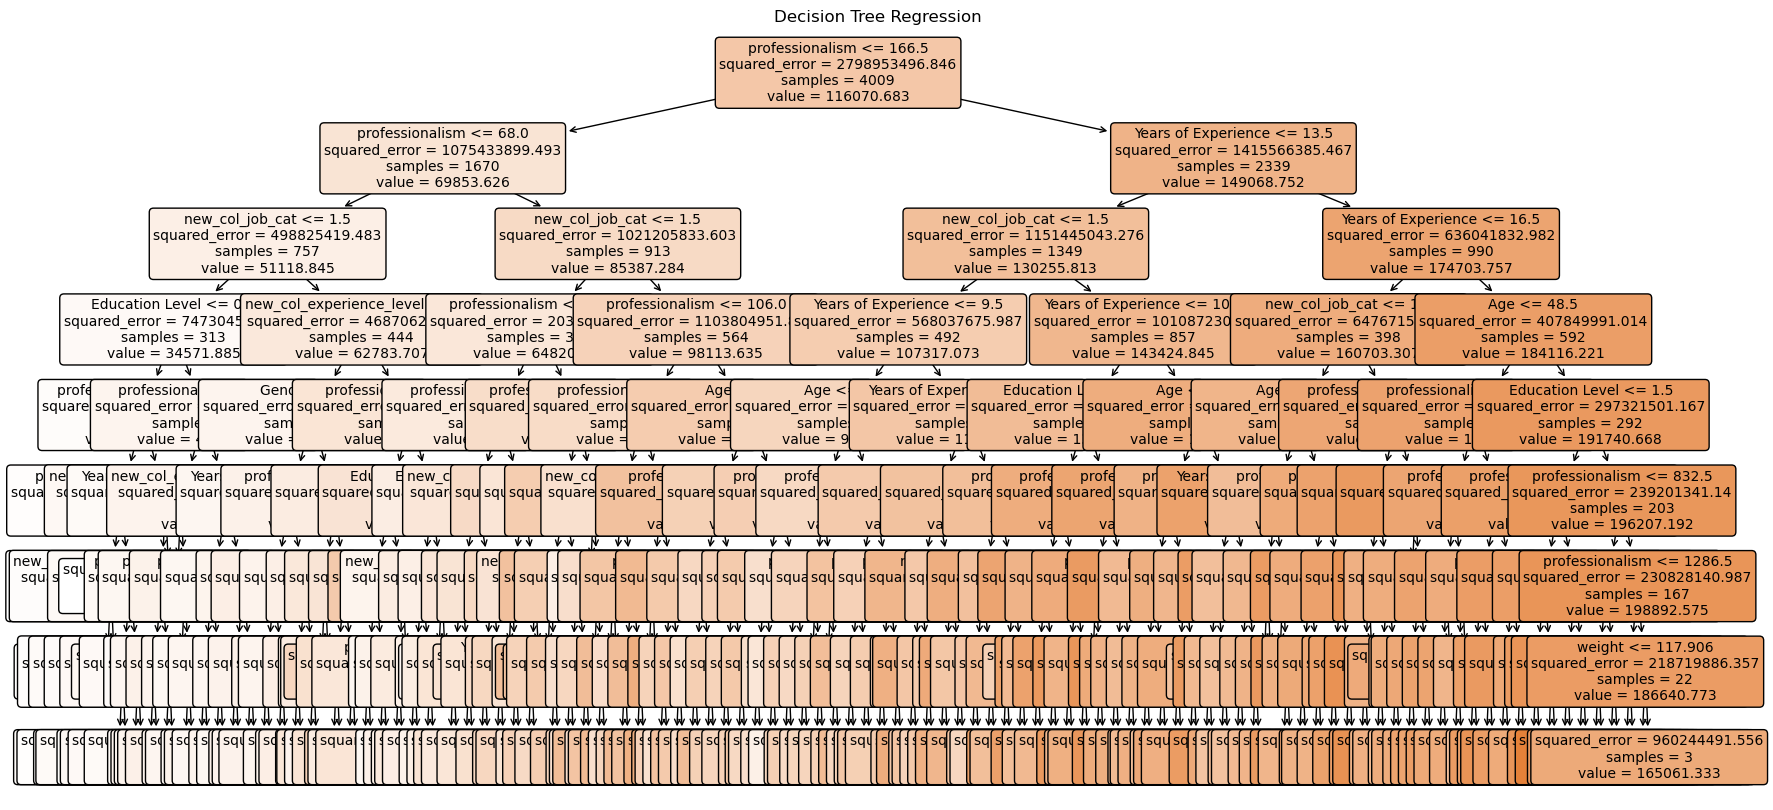

In [171]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_test.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Regression')
plt.show()

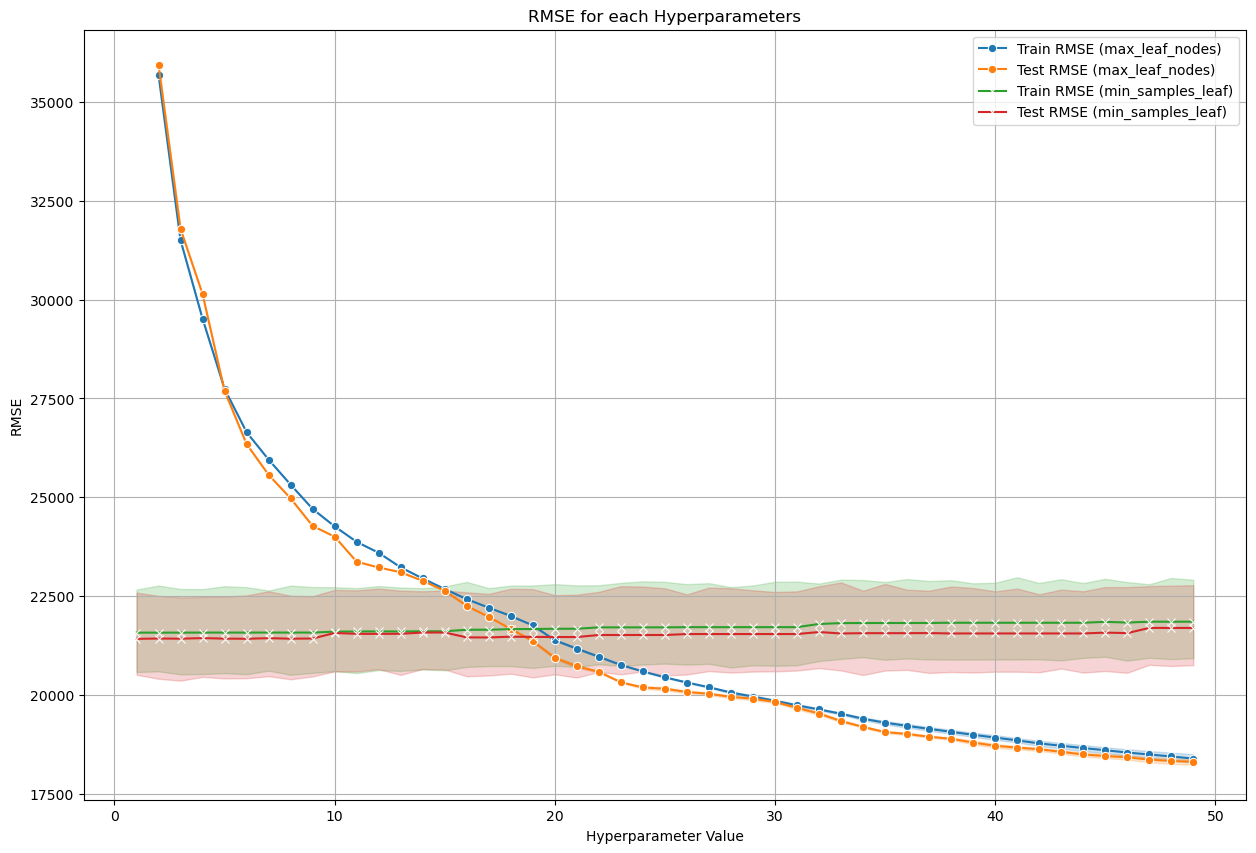

In [172]:
# Checking hyperparameters for improve RMSE

max_leaf_nodes = []
min_samples_leaf_values = []
rmse_train_l = []
rmse_test_l = []

for i in range(2, 50):   # Vary max_leaf_nodes from 2 to 50
    for j in range(1, 50):  # Vary min_samples_leaf from 1 to 50
        model = DecisionTreeRegressor(max_leaf_nodes=i, min_samples_leaf=j)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        rmse_train_i = mean_squared_error(y_train, y_pred_train, squared=False)
        rmse_test_i = mean_squared_error(y_test, y_pred_test, squared=False)
        max_leaf_nodes.append(i)
        min_samples_leaf_values.append(j)
        rmse_train_l.append(rmse_train_i)
        rmse_test_l.append(rmse_test_i)

# Create a new figure for the combined plot
plt.figure(figsize=(15, 10))

# Plot for varying max_leaf_nodes
sns.lineplot(x=max_leaf_nodes, y=rmse_train_l, marker='o', label='Train RMSE (max_leaf_nodes)')
sns.lineplot(x=max_leaf_nodes, y=rmse_test_l, marker='o', label='Test RMSE (max_leaf_nodes)')

# Plot for varying min_samples_leaf
sns.lineplot(x=min_samples_leaf_values, y=rmse_train_l, marker='x', label='Train RMSE (min_samples_leaf)')
sns.lineplot(x=min_samples_leaf_values, y=rmse_test_l, marker='x', label='Test RMSE (min_samples_leaf)')

plt.title('RMSE for each Hyperparameters')
plt.xlabel('Hyperparameter Value')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

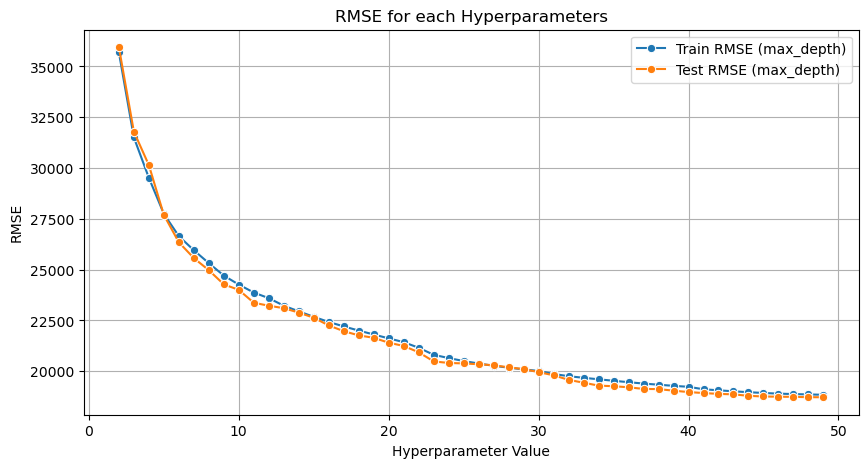

In [173]:
# Checking hyperparameters for improve RMSE

max_depth = []
rmse_train_l = []
rmse_test_l = []

for i in range(2, 50):   # Vary max_leaf_nodes from 2 to 50
    model = DecisionTreeRegressor(max_leaf_nodes=i, min_samples_leaf=j)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    max_depth.append(i)
    rmse_train_l.append(rmse_train)
    rmse_test_l.append(rmse_test)

plt.figure(figsize=(10, 5))

# # Plot for varying max_depth
sns.lineplot(x=max_depth, y=rmse_train_l, marker='o', label='Train RMSE (max_depth)')
sns.lineplot(x=max_depth, y=rmse_test_l, marker='o', label='Test RMSE (max_depth)')

plt.title('RMSE for each Hyperparameters')
plt.xlabel('Hyperparameter Value')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

In [174]:
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature:12}: {importance}')

Age         : 0.03646057736408537
Gender      : 0.004241717199669572
Education Level: 0.007732733736467517
Years of Experience: 0.15002142246538452
weight      : 0.0
professionalism: 0.7102640951522398
new_col_experience_level: 0.004992569880454523
new_col_job_cat: 0.0862868842016987


In [175]:
y_pred_train

array([164714.19230769, 190553.83333333,  66202.12389381, ...,
       100073.17073171, 111425.38738739, 164714.19230769])

# K Nearest Neighbors

In [176]:
# X = merged_df_copy.drop('Salary', axis=1)
# y = merged_df_copy['Salary']

X = merged_df_copy[['Age','Gender','Education Level','Years of Experience','professionalism','new_col_experience_level','new_col_job_cat']]
y = merged_df_copy['Salary']

model_KNN = KNeighborsRegressor(n_neighbors=12)
model_KNN.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)

y_pred_test = model.predict(X_test_scaled)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: 18841.00033005021
Test RMSE: 18721.038543821916


In [177]:
sum(cross_val_score(model_KNN, X, y, cv= 10))/10 

0.8884752484035305

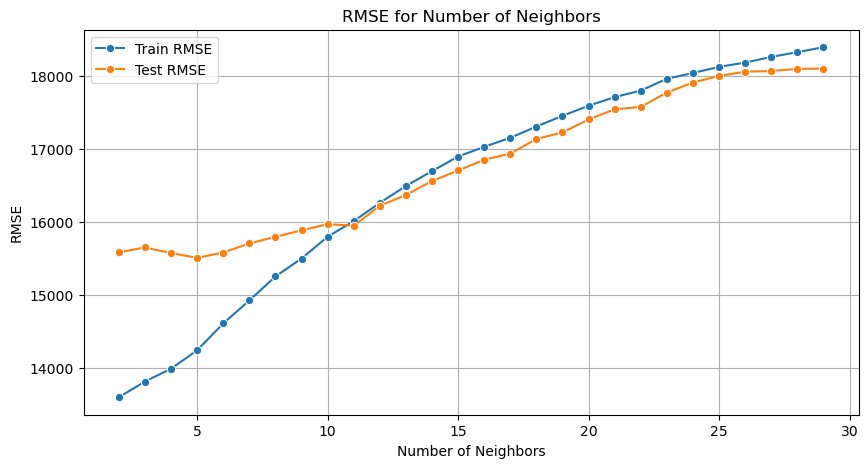

In [178]:
n_neighbors= []
rmse_train_KNN = []
rmse_test_KNN = []

for i in range(2,30):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    
    n_neighbors.append(i) 
    rmse_train_KNN.append(rmse_train)
    rmse_test_KNN.append(rmse_test)

plt.figure(figsize=(10, 5))
sns.lineplot(x=n_neighbors, y=rmse_train_KNN, marker='o', label='Train RMSE')
sns.lineplot(x=n_neighbors, y=rmse_test_KNN, marker='o', label='Test RMSE')
plt.title('RMSE for Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()

In [179]:
y_pred_train

array([161266.44827586, 158164.        ,  63413.79310345, ...,
       107896.55172414, 117257.79310345, 169053.93103448])

In [180]:
X_test_csv

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,id,professionalism
0,47.0,M,master's|degr,director|of|marketin,16.0,us,Hispanic,1.818297,88.182651,6480,675.0
1,29.0,F,bachelor's|degr,social|media|manage,4.0,us,African American,1.562833,59.760856,5343,81.0
2,29.0,M,high|scho,back|end|develope,5.0,us,African American,2.059395,46.765234,2576,108.0
3,40.0,M,master's|degr,marketing|directo,15.0,us,Asian,2.482954,89.530121,6103,532.0
4,29.0,M,bachelor's|degr,software|enginee,6.0,us,African American,1.639781,42.973461,3290,112.0
...,...,...,...,...,...,...,...,...,...,...,...
1336,44.0,M,master's|degr,product|manage,15.0,us,Hispanic,2.461952,87.903075,3263,588.0
1337,43.0,M,p,data|scientis,16.0,canad,White,2.208312,84.031023,4434,615.0
1338,41.0,F,master's|degr,marketing|coordinato,12.0,chin,Korean,1.755111,82.251038,4049,429.0
1339,37.0,M,bachelor's|degr,software|engineer|manage,10.0,australi,White,2.328205,71.174519,2102,288.0


In [183]:
# Assuming you have X_test_csv as a DataFrame containing the 'id' column and other features
# and you have y_pred_train as a list of predictions corresponding to X_train

# Create a dictionary mapping IDs to predictions
id_prediction_dict = {str(row.id): prediction for row, prediction in zip(X_test_csv.itertuples(), y_pred_train)}
id_prediction_dict
# Now id_prediction_dict contains the mapping of customer IDs to predictions


{'6480': 161266.44827586206,
 '5343': 158164.0,
 '2576': 63413.793103448275,
 '6103': 78292.96551724138,
 '3290': 30931.03448275862,
 '2797': 176586.2068965517,
 '6577': 79206.72413793103,
 '4401': 107251.5172413793,
 '693': 140931.0344827586,
 '4700': 25000.0,
 '666': 36025.51724137931,
 '694': 80446.03448275862,
 '6329': 90241.37931034483,
 '4129': 60137.93103448276,
 '1083': 49827.58620689655,
 '1606': 125782.55172413793,
 '5977': 162128.7931034483,
 '1231': 165344.8275862069,
 '4239': 190993.41379310345,
 '127': 35827.58620689655,
 '5606': 75172.41379310345,
 '6386': 45344.8275862069,
 '5990': 91859.68965517242,
 '5439': 166000.6551724138,
 '850': 25000.0,
 '2891': 48689.65517241379,
 '5483': 117257.79310344828,
 '1329': 129685.93103448275,
 '1763': 133965.5172413793,
 '3332': 60655.1724137931,
 '668': 96724.13793103448,
 '2591': 159887.41379310345,
 '2485': 175344.8275862069,
 '2484': 173965.5172413793,
 '1218': 162287.1724137931,
 '1125': 162128.7931034483,
 '5327': 110034.482758

In [184]:
import json

# Specify the file name for the JSON file
json_file_name = 'predictions.json'

# Write the dictionary to the JSON file
with open(json_file_name, 'w') as json_file:
    json.dump(id_prediction_dict, json_file)

print(f"Predictions saved to {json_file_name}")

Predictions saved to predictions.json
